<a href="https://colab.research.google.com/github/giuliabugatti09/sentiment-analysis-comments/blob/main/C%C3%B3pia_de_giuliabugatti09_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

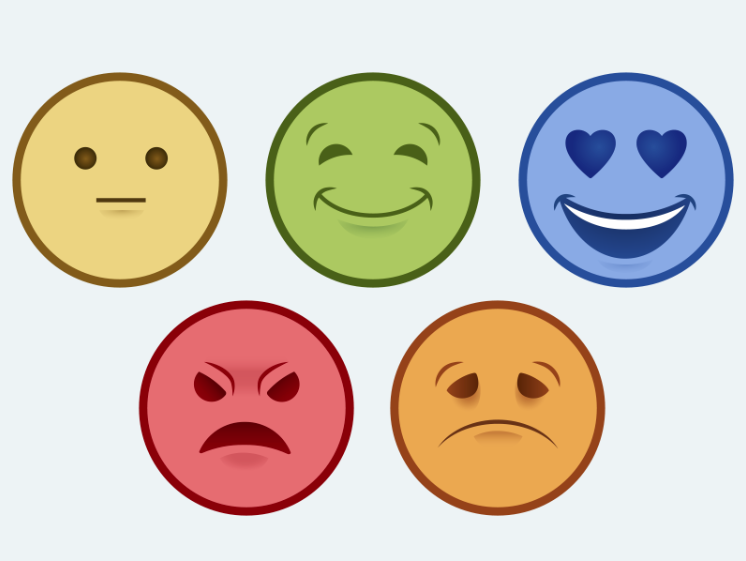

# **An√°lise de Sentimentos com Naive Bayes üôÇ**

## 1. Sobre o projeto
Este projeto tem como objetivo realizar a an√°lise de sentimentos em resenhas de filmes utilizando o algoritmo Naive Bayes. O modelo foi treinado com o dataset IMDb disponibilizado pelo NLTK, e classifica as resenhas como positivas ou negativas.

Neste projeto, usamos o Naive Bayes para treinar um modelo de classifica√ß√£o de texto e prever o sentimento de resenhas de filmes. O dataset utilizado √© composto por resenhas de filmes e seus respectivos sentimentos (positivo ou negativo).

## 2. Carregando os dados

### 2.1- Importando as bibliotecas

In [1]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
import matplotlib.pyplot as plt

# 3.- Visualiza√ß√£o de dados

### 3.1 - Gr√°fico de Acur√°cia

O c√≥digo gera um **gr√°fico de linha** que exibe a evolu√ß√£o da acur√°cia de um modelo de aprendizado de m√°quina ao longo do treinamento, **variando de 1 a 10 amostras de treino**. Ele plota a linha com marcadores, adiciona r√≥tulos de acur√°cia em cada ponto, e **personaliza o gr√°fico** com t√≠tulo, r√≥tulos nos eixos X e Y, e uma legenda. O gr√°fico tamb√©m inclui uma grade para facilitar a leitura e define os valores espec√≠ficos para os eixos. Por fim, o gr√°fico √© **salvo como uma imagem no formato PNG** e √© exibido.

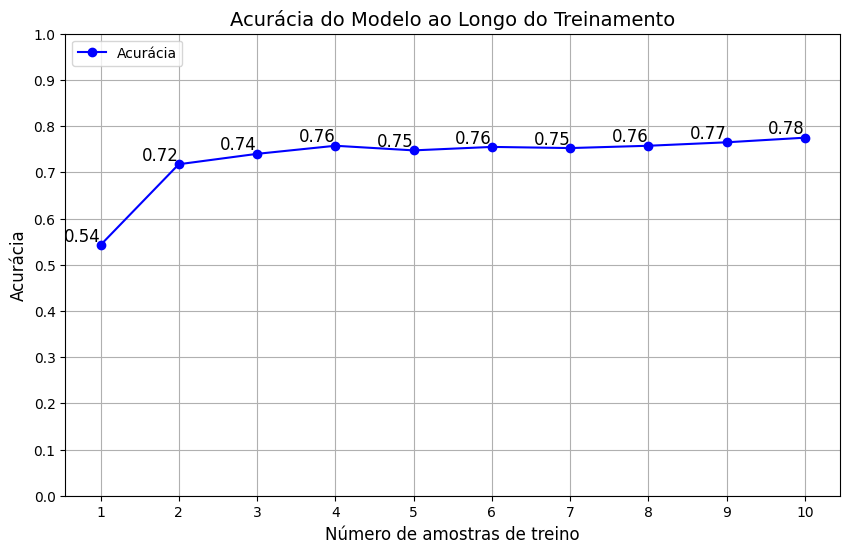

In [ ]:
# Salvar o gr√°fico como imagem
plt.figure(figsize=(10, 6))

# Plotando a linha do gr√°fico
plt.plot(range(1, 11), accuracies, marker='o', linestyle='-', color='b', label='Acur√°cia')

# Adicionando r√≥tulos de acur√°cia nos pontos
for i, acc in enumerate(accuracies):
    plt.text(i + 1, acc, f'{acc:.2f}', fontsize=12, ha='right', va='bottom', color='black')

# Adicionando t√≠tulo e r√≥tulos
plt.title('Acur√°cia do Modelo ao Longo do Treinamento', fontsize=14)
plt.xlabel('N√∫mero de amostras de treino', fontsize=12)
plt.ylabel('Acur√°cia', fontsize=12)

# Personalizando o gr√°fico
plt.grid(True)  # Adiciona linhas de grade para melhorar a leitura
plt.xticks(range(1, 11))  # Define os valores do eixo X
plt.yticks([x / 10 for x in range(0, 11)])  # Define os valores do eixo Y

# Adicionando legenda
plt.legend(loc='upper left')

# Salvar o gr√°fico em um arquivo .png
plt.savefig('acuracia_do_modelo.png', format='png', bbox_inches='tight')

# Mostrar o gr√°fico
plt.show()

### 3.2- Matriz de confus√£o

O c√≥digo realiza an√°lise de sentimentos em resenhas de filmes, usando o corpus `movie_reviews` do NLTK. Ele pr√©-processa os dados, treina um modelo de Naive Bayes Multinomial e avalia o desempenho com o `classification_report`. Tamb√©m gera e plota uma matriz de confus√£o com porcentagens, mostrando a precis√£o das previs√µes.

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


                                          comentario sentimento
0  plot : two teen couples go to a church party ,...        neg
1  the happy bastard ' s quick movie review damn ...        neg
2  it is movies like these that make a jaded movi...        neg
3  " quest for camelot " is warner bros . ' first...        neg
4  synopsis : a mentally unstable man undergoing ...        neg
              precision    recall  f1-score   support

         neg       0.77      0.85      0.81       199
         pos       0.83      0.75      0.79       201

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.80      0.80      0.80       400



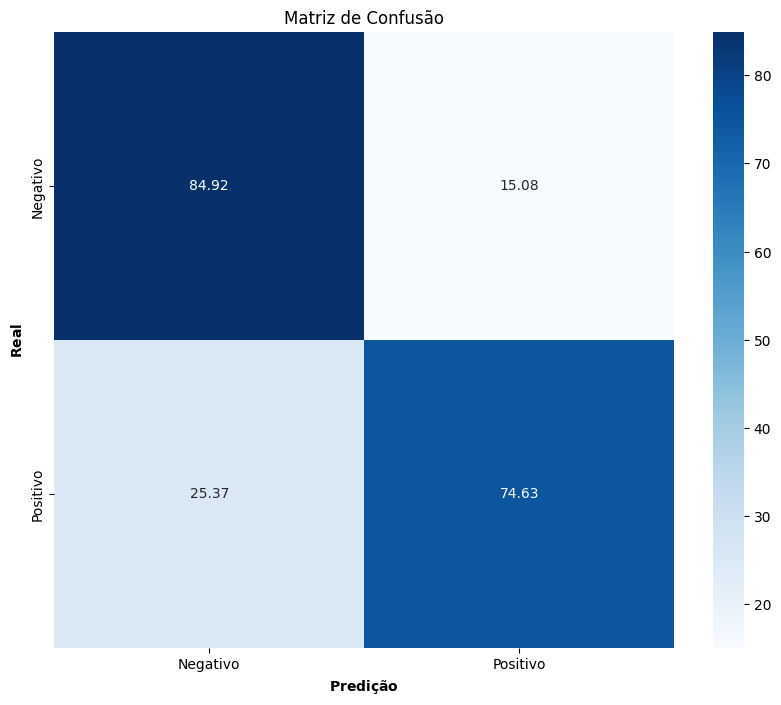

In [ ]:


# Baixar e carregar o dataset
nltk.download('movie_reviews')
from nltk.corpus import movie_reviews

# Criar o DataFrame
data = pd.DataFrame({
    'comentario': [' '.join(movie_reviews.words(fileid)) for fileid in movie_reviews.fileids()],
    'sentimento': [fileid.split('/')[0] for fileid in movie_reviews.fileids()]
})

# Visualizar as primeiras linhas
print(data.head())

# Pr√©-processamento
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['comentario'])
y = data['sentimento']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo
model = MultinomialNB()
model.fit(X_train, y_train)

# Fazer previs√µes
y_pred = model.predict(X_test)

# Avalia√ß√£o
print(classification_report(y_test, y_pred))

# Matriz de confus√£o com porcentagens
conf_matrix = confusion_matrix(y_test, y_pred, labels=['neg', 'pos'])
conf_matrix_percent = (conf_matrix / conf_matrix.sum(axis=1, keepdims=True)) * 100

# Plotar a matriz de confus√£o detalhada
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_percent, annot=True, fmt='.2f', cmap='Blues', xticklabels=['Negativo', 'Positivo'], yticklabels=['Negativo', 'Positivo'])
plt.title('Matriz de Confus√£o')
plt.xlabel(r'$\bf{Predi√ß√£o}$')
plt.ylabel(r'$\bf{Real}$')
plt.show()


### 3.3- M√©tricas de desempenho

O c√≥digo realiza an√°lise de sentimentos em resenhas de filmes, utilizando o corpus `movie_reviews` do NLTK. Ap√≥s pr√©-processar os dados e treinar um modelo de Naive Bayes Multinomial, ele avalia o modelo gerando um relat√≥rio de m√©tricas (precis√£o, recall, F1-score) por classe (positiva e negativa). Essas m√©tricas s√£o organizadas em um DataFrame e plotadas em um gr√°fico de barras, exibindo o desempenho do modelo para cada classe.

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


                                          comentario sentimento
0  plot : two teen couples go to a church party ,...        neg
1  the happy bastard ' s quick movie review damn ...        neg
2  it is movies like these that make a jaded movi...        neg
3  " quest for camelot " is warner bros . ' first...        neg
4  synopsis : a mentally unstable man undergoing ...        neg


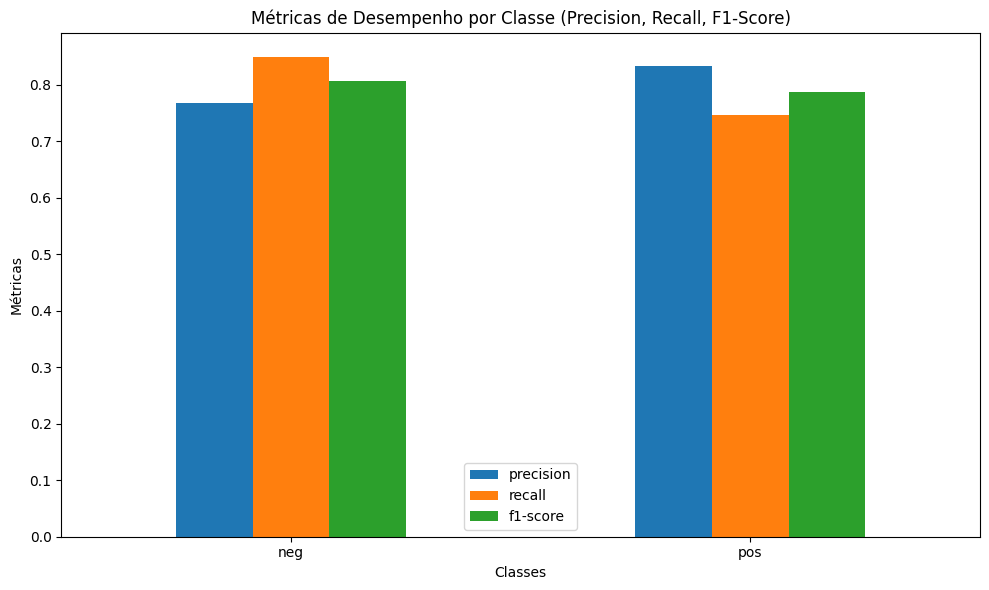

In [ ]:


# Baixar e carregar o dataset
nltk.download('movie_reviews')
from nltk.corpus import movie_reviews

# Criar o DataFrame
data = pd.DataFrame({
    'comentario': [' '.join(movie_reviews.words(fileid)) for fileid in movie_reviews.fileids()],
    'sentimento': [fileid.split('/')[0] for fileid in movie_reviews.fileids()]
})

# Visualizar as primeiras linhas
print(data.head())

# Pr√©-processamento
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['comentario'])
y = data['sentimento']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo
model = MultinomialNB()
model.fit(X_train, y_train)

# Fazer previs√µes
y_pred = model.predict(X_test)

# Avalia√ß√£o
report = classification_report(y_test, y_pred, output_dict=True)

# Converter o relat√≥rio para um DataFrame para visualiza√ß√£o
metrics = pd.DataFrame(report).transpose()

# Selecionar as m√©tricas que desejamos plotar
metrics = metrics.loc[['neg', 'pos'], ['precision', 'recall', 'f1-score']]

# Plotar as m√©tricas
metrics.plot(kind='bar', figsize=(10, 6))
plt.title('M√©tricas de Desempenho por Classe (Precision, Recall, F1-Score)')
plt.xlabel('Classes')
plt.ylabel('M√©tricas')
plt.xticks(rotation=0)
plt.tight_layout()

# Exibir o gr√°fico
plt.show()


## 4. Fluxograma do projeto- interativo

In [ ]:
import plotly.graph_objects as go

# Dados para o gr√°fico
nodes = [
    "Carregamento dos Dados",
    "Pr√©-processamento",
    "Treinamento do Modelo",
    "Avalia√ß√£o do Modelo",
    "Previs√£o"
]
edges = [
    ("Carregamento dos Dados", "Pr√©-processamento"),
    ("Pr√©-processamento", "Treinamento do Modelo"),
    ("Treinamento do Modelo", "Avalia√ß√£o do Modelo"),
    ("Avalia√ß√£o do Modelo", "Previs√£o")
]
values = [100, 90, 80, 75]  # Exemplo de valores (quantidade de dados em cada etapa)

# Criar √≠ndices dos nodes
sources = [nodes.index(edge[0]) for edge in edges]
targets = [nodes.index(edge[1]) for edge in edges]

# Configurar o Sankey Diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=20,
        thickness=30,
        line=dict(color="black", width=0.8),
        label=nodes,
        color=["#636EFA", "#EF553B", "#00CC96", "#AB63FA", "#FFA15A"]  # Cores personalizadas
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        color="rgba(100, 149, 237, 0.4)"  # Cor transl√∫cida das conex√µes
    )
)])

# Configura√ß√µes do layout
fig.update_layout(
    title_text="Fluxograma do Projeto: An√°lise de Sentimentos",
    title_font_size=20,
    font=dict(size=14),
    height=600,
    width=900,
    margin=dict(l=50, r=50, t=50, b=50),
    paper_bgcolor="white",
    plot_bgcolor="white"
)

# Mostrar o gr√°fico
fig.show()


### 5. Exemplo de entrada e sa√≠da

5 exemplos de entrada e sa√≠da, juntamente com o sentimento envolvido do coment√°rio

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


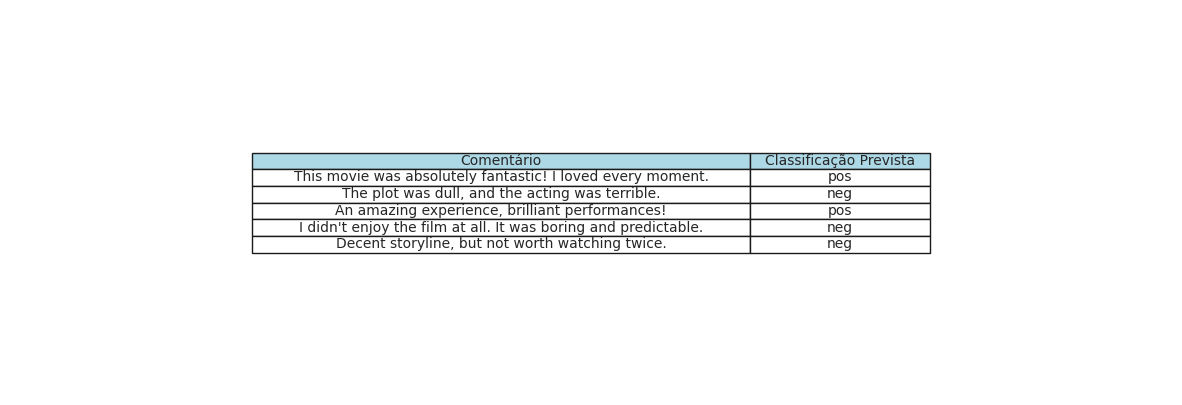

In [ ]:


# Baixar e carregar o dataset
nltk.download('movie_reviews')
from nltk.corpus import movie_reviews

# Criar o DataFrame
data = pd.DataFrame({
    'comentario': [' '.join(movie_reviews.words(fileid)) for fileid in movie_reviews.fileids()],
    'sentimento': [fileid.split('/')[0] for fileid in movie_reviews.fileids()]
})

# Pr√©-processamento
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['comentario'])
y = data['sentimento']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo
model = MultinomialNB()
model.fit(X_train, y_train)

# Exemplo de entrada e sa√≠da
exemplos = pd.DataFrame({
    "Coment√°rio": [
        "This movie was absolutely fantastic! I loved every moment.",
        "The plot was dull, and the acting was terrible.",
        "An amazing experience, brilliant performances!",
        "I didn't enjoy the film at all. It was boring and predictable.",
        "Decent storyline, but not worth watching twice."
    ],
    "Classifica√ß√£o Prevista": model.predict(vectorizer.transform([
        "This movie was absolutely fantastic! I loved every moment.",
        "The plot was dull, and the acting was terrible.",
        "An amazing experience, brilliant performances!",
        "I didn't enjoy the film at all. It was boring and predictable.",
        "Decent storyline, but not worth watching twice."
    ]))
})

# Configurar estilo do Seaborn
sns.set_theme(style="whitegrid")

# Plotar a tabela estilizada
fig, ax = plt.subplots(figsize=(15, 5))
ax.axis('tight')
ax.axis('off')
table = ax.table(
    cellText=exemplos.values,
    colLabels=exemplos.columns,
    cellLoc="center",
    loc="center",
    colColours=["#ADD8E6", "#ADD8E6"]
)

table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(exemplos.columns))))



# Mostrar o gr√°fico no Colab
plt.show()


##6. Conclus√£o

Este projeto demonstrou a aplica√ß√£o de t√©cnicas de processamento de linguagem natural e aprendizado de m√°quina para an√°lise de sentimentos em resenhas de filmes. Utilizando o corpus `movie_reviews` do NLTK, foi treinado um modelo de Naive Bayes Multinomial para classificar as resenhas como positivas ou negativas. A avalia√ß√£o do modelo foi realizada com base em m√©tricas de precis√£o, recall e F1-score, sendo as m√©tricas visualizadas atrav√©s de um gr√°fico de barras. Os resultados indicam um bom desempenho do modelo na classifica√ß√£o das resenhas, mostrando como t√©cnicas de NLP podem ser eficazes na an√°lise de sentimentos em textos.

Agrade√ßo pela visita ao reposit√≥rio e convido voc√™ a acompanhar o progresso deste projeto. Para mais informa√ß√µes ou para discutir colabora√ß√µes, sinta-se √† vontade para me contatar pelo meu [LinkedIn.](https://www.linkedin.com/in/giulia-bugatti-fonseca-226955267/)